In [1]:
import traci
import sumolib

In [2]:
def new_logic(ggrr, yyrr, rrgg, rryy):

    tls_ids = traci.trafficlight.getIDList()
    id_semaforo = tls_ids[0]
    programa = traci.trafficlight.getAllProgramLogics(id_semaforo)
    
    from traci._trafficlight import Logic, Phase

    new_logic = Logic(programID="nuevo_programa", type=0,currentPhaseIndex=0,phases=[Phase(duration=ggrr, state="GGrr", minDur=ggrr, maxDur=ggrr ), Phase(duration=yyrr, state='yyrr', minDur=yyrr, maxDur=yyrr), Phase(duration=rrgg, state='rrGG', minDur=rrgg, maxDur=rrgg), Phase(duration=rryy, state='rryy', minDur=rryy, maxDur=rryy)])

    traci.trafficlight.setProgramLogic(id_semaforo, new_logic)

    traci.trafficlight.setProgram(id_semaforo, "nuevo_programa")

    #print(traci.trafficlight.getCompleteRedYellowGreenDefinition(id_semaforo))


In [3]:
import numpy as np

def n_vehiculos(n0, n1):

    t0=0
    t1=0
    for i in range(n0):

        t0+= np.random.exponential(scale=3600/n0)

        traci.vehicle.add(
            vehID=f"veh_r0_{i}",
            routeID="r_0", # Asegúrate de tener un tipo definido (por defecto puedes omitir esto si usas default)
            depart=t0
        )

    for i in range(n1):

        t1+= np.random.exponential(scale=3600/n1)

        traci.vehicle.add(
            vehID=f"veh_r1_{i}",
            routeID="r_1",
            depart=t1
        )

In [9]:
#Se importan algunos de los paquetes requeridos
import random as rd
import pandas as pd
import traci
import sumolib

avgtimes=[]#tiempos promedio
ggrrs = []#(verde Norte-Sur)
yyrrs = []#(amarillo Norte-Sur)
rrggs = []# (verde Este-Oeste)
rryys = []#(amarillo Este-Oeste)
n0s = []#Tiempos ruta 0
n1s = []#Tiempos ruta 1
num_simulations = 1000

f0 = [i for i in range(10,1500, 100)]
f1 = [i for i in range(10,2000, 100)]


for i in range(num_simulations):

    n0 = rd.choice(f0)
    n1 = rd.choice(f1)

    n0s.append(n0)
    n1s.append(n1)

    sumoBinary = "sumo"
    sumoCmd = [sumoBinary, "-c", "prueba.sumocfg"]

    traci.start(sumoCmd)

    n_vehiculos(n0, n1)

    ggrr = rd.randint(30,70) #(verde Norte-Sur) 
    yyrr = rd.randint(3,7) #(amarillo Norte-Sur)
    rrgg = rd.randint(30,70) # (verde Este-Oeste)
    rryy = rd.randint(3,7) #(amarillo Este-Oeste)

    ggrrs.append(ggrr)
    yyrrs.append(yyrr)
    rrggs.append(rrgg)
    rryys.append(rryy)

    new_logic(ggrr, yyrr, rrgg, rryy)
    
    depart_times = {}
    arrival_times = {}
    simulation_durations = {}

    for step in range(3600):
        traci.simulationStep()

        departed_vehicles = traci.simulation.getDepartedIDList()
        current_time = traci.simulation.getTime()
        for veh_id in departed_vehicles:
            if veh_id not in depart_times:
                depart_times[veh_id] = current_time
        
        

        arrived_vehicles = traci.simulation.getArrivedIDList()
        current_time = traci.simulation.getTime()
        for veh_id in arrived_vehicles:
            if veh_id not in arrival_times:
                arrival_times[veh_id] = current_time



    for veh_id, arrival_time in arrival_times.items():
        if veh_id in depart_times:
            departure_time = depart_times[veh_id]
            duration = arrival_time - departure_time
            simulation_durations[veh_id] = duration

    average = sum(simulation_durations.values())/len(simulation_durations)

    avgtimes.append(average)

    traci.close()
    print(i+1)
data = {
    'Simulation' : range(1, num_simulations + 1),
    'Tiempo promedio' : avgtimes,
    'GGrr (s)' : ggrrs,
    'yyrr (s)' : yyrrs,
    'rrGG (s)' : rrggs,
    'rryy (s)' : rryys,
    'Autos r_0': n0s,
    'Autos r_1': n1s
}

df100 = pd.DataFrame(data)
df100

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


,Simulation,Tiempo promedio,GGrr (s),yyrr (s),rrGG (s),rryy (s),Autos r_0,Autos r_1
0,1,142.212500,49,6,36,4,1210,1510
1,2,110.526829,43,7,48,6,1310,910
2,3,111.337977,54,6,58,5,510,1710
3,4,113.634084,55,6,69,3,810,1710
4,5,104.674466,67,3,46,7,410,610
...,...,...,...,...,...,...,...,...
995,996,112.825793,55,3,68,5,810,1510
996,997,101.844794,67,4,58,3,10,510
997,998,113.806452,52,6,63,5,310,1510
998,999,107.772790,56,4,33,5,910,610


In [10]:
df100.shape

(1000, 8)

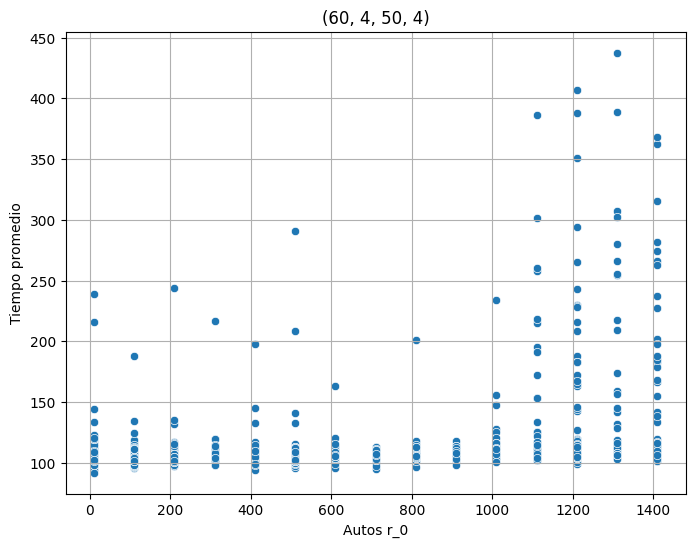

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(8, 6))
sns.scatterplot(x=df100['Autos r_0'], y=df100['Tiempo promedio'])
plt.title('(60, 4, 50, 4)')
plt.grid(True)
plt.show()

In [12]:
df100.to_csv('Sim7-4001-5000.csv', index=False)

In [29]:
traci.close()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd


In [ ]:
data = pd.read_csv('1kmDatos.csv')

variables_independientes = ['GGrr (s)','yyrr (s)','rrGG (s)','rryy (s)','Autos r_0', 'Autos r_1']
variable_dependiente = 'Tiempo promedio'

X = data[variables_independientes]
y = data[variable_dependiente]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
modelo1 = make_pipeline( PolynomialFeatures(degree=1), LinearRegression())
modelo1.fit(X_train, y_train)